In [44]:
# importing necessary dependecies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [15]:

train_file = "../data/raw/train.csv"
df = pd.read_csv(train_file)

In [16]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [17]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [19]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [21]:
df.duplicated().sum()

np.int64(0)

In [75]:
cat_columns = [feature for feature in df.columns if feature in df.select_dtypes(['object']).columns]

cat_columns

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [67]:
# col_count = []
# for cat in cat_columns:
#     count = df[cat].value_counts().shape[0]
#     col_count.append({'column' : cat, 'count' : count})

test_count = [{'column' : cat, 'count' : df[cat].nunique()} for cat in cat_columns]
cat_df = pd.DataFrame(test_count)

cat_df

,column,count
0,state,51
1,area_code,3
2,international_plan,2
3,voice_mail_plan,2
4,churn,2


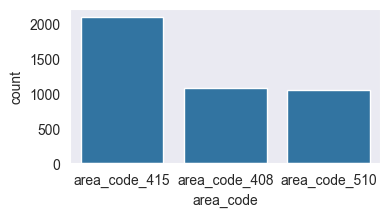

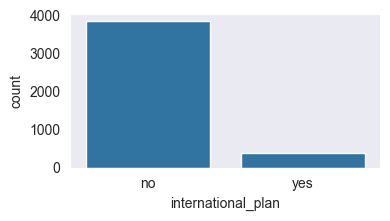

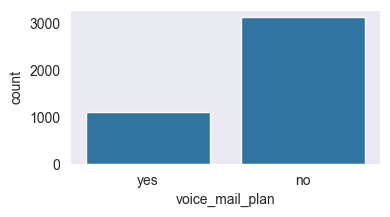

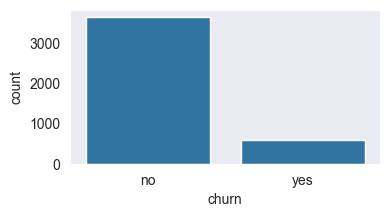

In [71]:
for i in range(1, len(cat_columns)):
    plt.figure(figsize=(4,2))
    sns.countplot(x=cat_columns[i], data=df)
    plt.show()
                  

In [24]:
# selecting numerical variables

df_num = df.select_dtypes(['int', 'float'])

df_num.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


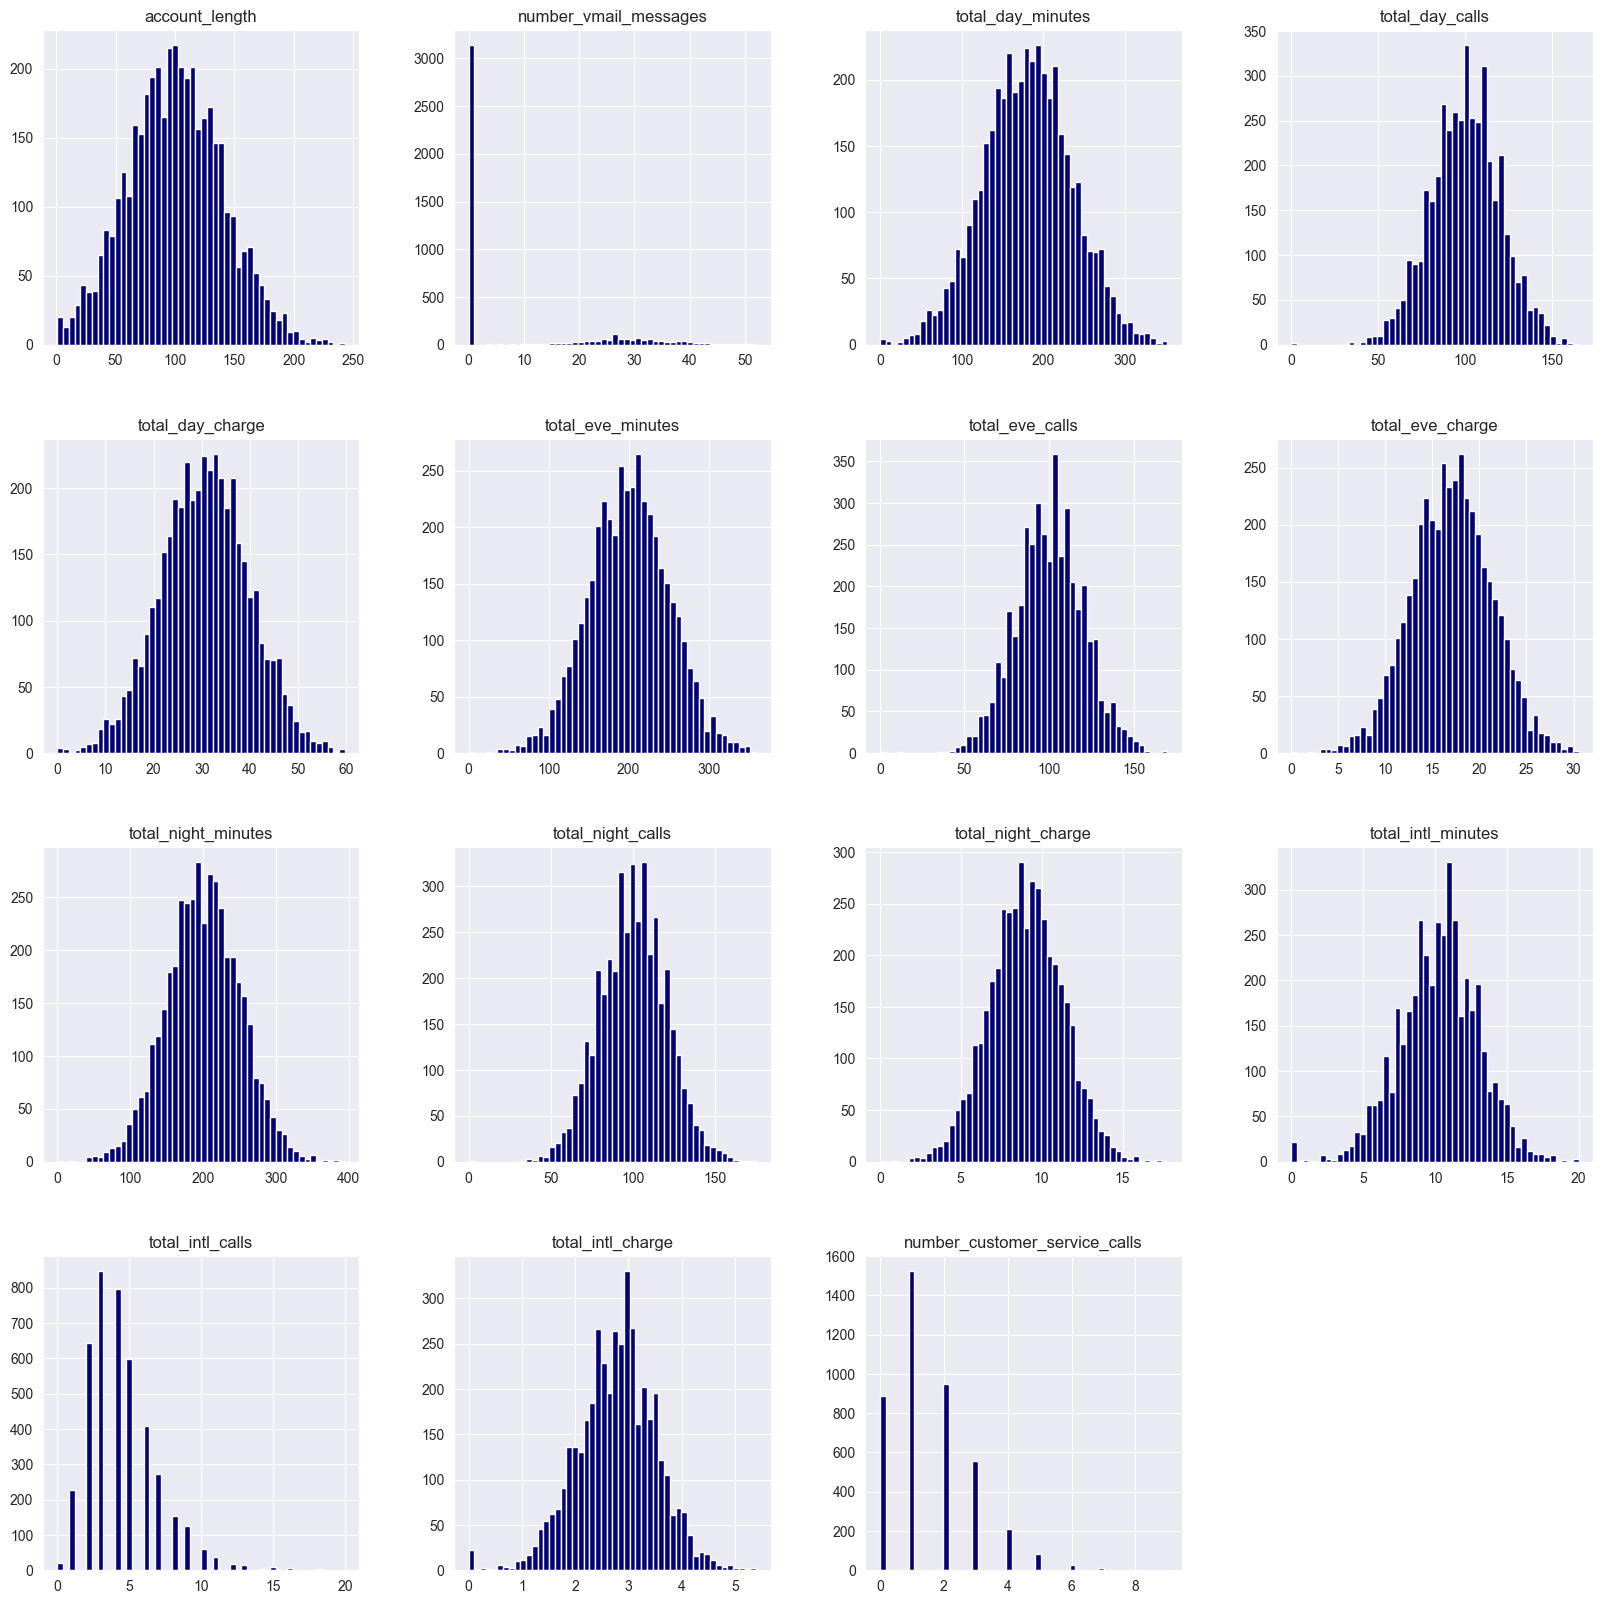

In [51]:
sns.set_style('dark')
df.hist(bins=50, figsize=(20,20), color='navy')
plt.show()

In [ ]:
# To visualize the outliers using box plots

for col in df_num.columns:
    plt.figure(figsize=(4,6))
    # sns.boxplot(data=df, x=df['churn'], y=col)
    sns.boxplot(data=df_num, y=col)
    plt.title('Visualize Outliers')
    plt.show()

In [45]:
# creating a function to count outliers 

def outlier_table_count(df, columns, handle_outliers=False):
    outlier_counts = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 - 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        outlier_counts.append({'column' : col, 'outlier' : outlier_count})
        
        if handle_outliers:
            # using .clip()
            # df[col] = df[col].clip(lower = lower_bound, upper = upper_bound)
            
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
            
    outlier_df = pd.DataFrame(outlier_counts)
    
    return outlier_df, df


outlier_table_count(df_num, df_num.columns, handle_outliers=True)
        
        
        


(                           column  outlier
 0                  account_length     3870
 1           number_vmail_messages     4250
 2               total_day_minutes     3900
 3                 total_day_calls     3840
 4                total_day_charge     3900
 5               total_eve_minutes     3903
 6                 total_eve_calls     3884
 7                total_eve_charge     3906
 8             total_night_minutes     3888
 9               total_night_calls     3891
 10             total_night_charge     3888
 11             total_intl_minutes     3865
 12               total_intl_calls     4002
 13              total_intl_charge     3865
 14  number_customer_service_calls     3364,
       account_length  number_vmail_messages  total_day_minutes  \
 0               46.0                   -8.0           106.8875   
 1               46.0                   -8.0           106.8875   
 2               46.0                   -8.0           106.8875   
 3               46.0      